In [1]:
import pandas as pd
import numpy as np
import urllib.request as req
import json
import sqlalchemy
import psycopg2
import pymongo
import time
import os
from IPython.display import clear_output
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import normalized_mutual_info_score
import re

In [28]:
cusip = pd.read_excel('D:\\Michael\\Data\\Ratings\\Billionaire\\cusipforparse3.xlsx', dtype = 'str')
cusip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45653 entries, 0 to 45652
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cusip         45653 non-null  object
 1   tickercusip   42634 non-null  object
 2   nameOfIssuer  45653 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB


In [29]:
billi = pd.DataFrame()
n=0

for i in cusip.cusip:
    
    
    clear_output(wait = True)
    print('Downloading: ' + str(n))
  


    url = 'https://fmpcloud.io/api/v3/cusip/' + str(i) + '?apikey=d161163634c0fd0da0581d810d9b7c66' 

    with req.urlopen(url) as session:
        response = session.read().decode()
        data = json.loads(response)
    dat = pd.DataFrame(data) 
    billi = billi.append(dat)


    billi.to_excel('D:\\Michael\\Data\\Ratings\\Billionaire\\' +  'ALL CUSIP.xlsx', index = False)
    
    n += 1
#     time.sleep(0.3)
billi

Downloading: 45652


,ticker,cusip,company
0,HBAN240119C00015000,C00018000,Call FITB 5-20-16 @ 18
0,,C00033000,Call BP 4-15-16 @ 33
0,CBBT,C00036000,Call BBT 6-17-16 @ 36
0,AMGN 0.375 02/01/13 144A,031162AP5,Amgen Inc.
0,,2651389MI,Call FAST 8-19-16 @ 50
...,...,...,...
0,SDD,74348a327,ProShares Ultra Short Small Ca
0,DUST,25460e844,Direxion Daily Gold Mnr
0,,278285101,EATON VANCE TAX ADV GLOBAL DIV
0,,879111400,TEKLA LIFE SCIENCES INVESTORS


In [30]:
url = 'https://fmpcloud.io/api/v4/mapper-cik-name?apikey=d161163634c0fd0da0581d810d9b7c66' 

with req.urlopen(url) as session:
    response = session.read().decode()
    data = json.loads(response)
dat = pd.DataFrame(data)
dat

,reportingCik,reportingName
0,0001453356,"10X Fund, L.P."
1,0001453356,10X FUND LP
2,0001749194,1118 Ltd
3,0001540531,12 West Capital Management LP
4,0001612412,1347 Capital LLC
...,...,...
117497,0001192896,ZYLSTRA MICHAEL J
117498,0001541244,Zyman Sergio
117499,0001824557,Zynczak Heather
117500,0001679876,ZYNGIER ALEXANDRE


In [31]:
dat.to_excel('D:\\Michael\\Data\\Insider trades\\FMP\\' +  'reportingCik.xlsx', index = False)

In [41]:
cik = pd.read_excel('D:\\Michael\\Data\\Insider trades\\FMP\\reportingCik1.xlsx', dtype = 'str')
cik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53824 entries, 0 to 53823
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   reportingCik   53824 non-null  object
 1   reportingName  53824 non-null  object
dtypes: object(2)
memory usage: 841.1+ KB


In [42]:
billi = pd.DataFrame()
n=0

for i in cik.reportingCik:
    
    
    clear_output(wait = True)
    print('Downloading: ' + str(n))
  


    url = 'https://fmpcloud.io/api/v4/insider-trading?reportingCik=' + str(i) + '&apikey=d161163634c0fd0da0581d810d9b7c66' 

    with req.urlopen(url) as session:
        response = session.read().decode()
        data = json.loads(response)
    dat = pd.DataFrame(data) 
    billi = billi.append(dat)



    
    n += 1
    
#     time.sleep(0.3)
billi

Downloading: 53823


,symbol,filingDate,transactionDate,reportingCik,transactionType,securitiesOwned,companyCik,reportingName,typeOfOwner,acquistionOrDisposition,formType,securitiesTransacted,price,securityName,link
0,FIS,2022-01-26 18:38:46,2022-01-24,0001067886,A-Award,1.481600e+04,0001136893,LOWTHERS BRUCE F JR,officer: President,A,4,14816.0,0.0,Restricted Stock Units,https://www.sec.gov/Archives/edgar/data/000113...
1,FIS,2021-08-12 16:35:28,2021-08-11,0001067886,G-Gift,7.526103e+04,0001136893,LOWTHERS BRUCE F JR,"officer: President, Banking & Merchant",D,4,1200.0,0.0,Common Stock,https://www.sec.gov/Archives/edgar/data/000113...
2,FIS,2021-08-09 17:25:22,2021-08-05,0001067886,F-InKind,7.646103e+04,0001136893,LOWTHERS BRUCE F JR,"officer: President, Banking & Merchant",D,4,4328.0,129.52,Common Stock,https://www.sec.gov/Archives/edgar/data/000113...
3,FIS,2021-08-09 17:25:22,2021-08-05,0001067886,A-Award,8.078903e+04,0001136893,LOWTHERS BRUCE F JR,"officer: President, Banking & Merchant",A,4,10998.0,0.0,Common Stock,https://www.sec.gov/Archives/edgar/data/000113...
4,FIS,2020-11-03 17:43:55,2020-11-02,0001067886,G-Gift,5.577009e+04,0001136893,LOWTHERS BRUCE F JR,"officer: President, Banking & Merchant",D,4,1000.0,0.0,Common Stock,https://www.sec.gov/Archives/edgar/data/000113...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,AFFS,2014-03-07 16:12:23,2014-01-09,0001380832,G-Gift,1.296380e+05,0001365555,Zyskind Barry D,"director, 10 percent owner, officer: Chairman,...",A,4,19638.0,0.0,Common Stock,https://www.sec.gov/Archives/edgar/data/000136...
96,AFFS,2013-02-20 14:24:52,2013-02-15,0001380832,F-InKind,6.380523e+06,0001365555,Zyskind Barry D,"director, 10 percent owner, officer: Chairman,...",D,4,29357.0,33.03,Common Stock,https://www.sec.gov/Archives/edgar/data/000136...
97,AFFS,2012-12-21 14:43:00,2012-12-20,0001380832,G-Gift,6.762125e+06,0001365555,Zyskind Barry D,"director, 10 percent owner, officer: Chairman,...",D,4,76575.0,0.0,Common Stock,https://www.sec.gov/Archives/edgar/data/000136...
98,AFFS,2012-12-21 14:43:00,2012-12-20,0001380832,G-Gift,6.409880e+06,0001365555,Zyskind Barry D,"director, 10 percent owner, officer: Chairman,...",D,4,352245.0,0.0,Common Stock,https://www.sec.gov/Archives/edgar/data/000136...


In [43]:
billi

,symbol,filingDate,transactionDate,reportingCik,transactionType,securitiesOwned,companyCik,reportingName,typeOfOwner,acquistionOrDisposition,formType,securitiesTransacted,price,securityName,link
0,FIS,2022-01-26 18:38:46,2022-01-24,0001067886,A-Award,1.481600e+04,0001136893,LOWTHERS BRUCE F JR,officer: President,A,4,14816.0,0.0,Restricted Stock Units,https://www.sec.gov/Archives/edgar/data/000113...
1,FIS,2021-08-12 16:35:28,2021-08-11,0001067886,G-Gift,7.526103e+04,0001136893,LOWTHERS BRUCE F JR,"officer: President, Banking & Merchant",D,4,1200.0,0.0,Common Stock,https://www.sec.gov/Archives/edgar/data/000113...
2,FIS,2021-08-09 17:25:22,2021-08-05,0001067886,F-InKind,7.646103e+04,0001136893,LOWTHERS BRUCE F JR,"officer: President, Banking & Merchant",D,4,4328.0,129.52,Common Stock,https://www.sec.gov/Archives/edgar/data/000113...
3,FIS,2021-08-09 17:25:22,2021-08-05,0001067886,A-Award,8.078903e+04,0001136893,LOWTHERS BRUCE F JR,"officer: President, Banking & Merchant",A,4,10998.0,0.0,Common Stock,https://www.sec.gov/Archives/edgar/data/000113...
4,FIS,2020-11-03 17:43:55,2020-11-02,0001067886,G-Gift,5.577009e+04,0001136893,LOWTHERS BRUCE F JR,"officer: President, Banking & Merchant",D,4,1000.0,0.0,Common Stock,https://www.sec.gov/Archives/edgar/data/000113...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,AFFS,2014-03-07 16:12:23,2014-01-09,0001380832,G-Gift,1.296380e+05,0001365555,Zyskind Barry D,"director, 10 percent owner, officer: Chairman,...",A,4,19638.0,0.0,Common Stock,https://www.sec.gov/Archives/edgar/data/000136...
96,AFFS,2013-02-20 14:24:52,2013-02-15,0001380832,F-InKind,6.380523e+06,0001365555,Zyskind Barry D,"director, 10 percent owner, officer: Chairman,...",D,4,29357.0,33.03,Common Stock,https://www.sec.gov/Archives/edgar/data/000136...
97,AFFS,2012-12-21 14:43:00,2012-12-20,0001380832,G-Gift,6.762125e+06,0001365555,Zyskind Barry D,"director, 10 percent owner, officer: Chairman,...",D,4,76575.0,0.0,Common Stock,https://www.sec.gov/Archives/edgar/data/000136...
98,AFFS,2012-12-21 14:43:00,2012-12-20,0001380832,G-Gift,6.409880e+06,0001365555,Zyskind Barry D,"director, 10 percent owner, officer: Chairman,...",D,4,352245.0,0.0,Common Stock,https://www.sec.gov/Archives/edgar/data/000136...


In [44]:
billi.to_csv('D:\\Michael\\Data\\Insider trades\\FMP\\reportingCikALL.csv', index = False)

In [45]:
path = 'D:\\Michael\\Data\\Insider trades\\FMP\\reportingCik\\'

for filename in os.listdir(path):
    dat = pd.read_csv(path + filename)
    Result = Result.append(dat)
    
Result.to_csv('D:\\Michael\\Data\\Insider trades\\FMP\\' + 'reportingCikALL.csv', index = False)

In [6]:
Result = pd.read_csv('D:\\Michael\\Data\\Insider trades\\FMP\\' + 'reportingCikALL.csv')
Result.typeOfOwner = Result.typeOfOwner.str.upper()
Result

,symbol,filingDate,transactionDate,reportingCik,transactionType,securitiesOwned,companyCik,reportingName,typeOfOwner,acquistionOrDisposition,formType,securitiesTransacted,price,securityName,link
0,GALT,2022-02-04 18:23:24,2022-02-02,1453356,S-Sale,6178940.0,1133416,"10X Fund, L.P.",10 PERCENT OWNER,D,4,10000.0,2.10,Common Stock,https://www.sec.gov/Archives/edgar/data/000113...
1,GALT,2022-01-13 15:42:07,2022-01-11,1453356,S-Sale,6188940.0,1133416,"10X Fund, L.P.",10 PERCENT OWNER,D,4,10000.0,2.10,Common Stock,https://www.sec.gov/Archives/edgar/data/000113...
2,GALT,2021-12-06 12:42:51,2021-12-02,1453356,S-Sale,6198940.0,1133416,"10X Fund, L.P.",10 PERCENT OWNER,D,4,10000.0,2.37,Common Stock,https://www.sec.gov/Archives/edgar/data/000113...
3,GALT,2021-11-04 11:55:59,2021-11-01,1453356,S-Sale,6208940.0,1133416,"10X Fund, L.P.",10 PERCENT OWNER,D,4,10000.0,3.19,Common Stock,https://www.sec.gov/Archives/edgar/data/000113...
4,GALT,2021-10-19 15:18:14,2021-10-15,1453356,S-Sale,6218940.0,1133416,"10X Fund, L.P.",10 PERCENT OWNER,D,4,10000.0,3.37,Common Stock,https://www.sec.gov/Archives/edgar/data/000113...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4445114,AFFS,2014-03-07 16:12:23,2014-01-09,1380832,G-Gift,129638.0,1365555,Zyskind Barry D,"DIRECTOR, 10 PERCENT OWNER, OFFICER: CHAIRMAN,...",A,4,19638.0,0.00,Common Stock,https://www.sec.gov/Archives/edgar/data/000136...
4445115,AFFS,2013-02-20 14:24:52,2013-02-15,1380832,F-InKind,6380523.0,1365555,Zyskind Barry D,"DIRECTOR, 10 PERCENT OWNER, OFFICER: CHAIRMAN,...",D,4,29357.0,33.03,Common Stock,https://www.sec.gov/Archives/edgar/data/000136...
4445116,AFFS,2012-12-21 14:43:00,2012-12-20,1380832,G-Gift,6762125.0,1365555,Zyskind Barry D,"DIRECTOR, 10 PERCENT OWNER, OFFICER: CHAIRMAN,...",D,4,76575.0,0.00,Common Stock,https://www.sec.gov/Archives/edgar/data/000136...
4445117,AFFS,2012-12-21 14:43:00,2012-12-20,1380832,G-Gift,6409880.0,1365555,Zyskind Barry D,"DIRECTOR, 10 PERCENT OWNER, OFFICER: CHAIRMAN,...",D,4,352245.0,0.00,Common Stock,https://www.sec.gov/Archives/edgar/data/000136...


In [111]:
Result.sort_values(by = ['typeOfOwner'])

,symbol,filingDate,transactionDate,reportingCik,transactionType,securitiesOwned,companyCik,reportingName,typeOfOwner,acquistionOrDisposition,formType,securitiesTransacted,price,securityName,link
0,GALT,2022-02-04 18:23:24,2022-02-02,1453356,S-Sale,6178940.0,1133416,"10x fund, l.p.",10 PERCENT OWNER,D,4,10000.0,2.10,Common Stock,https://www.sec.gov/Archives/edgar/data/000113...
608260,PAYC,2015-09-30 16:06:17,2015-09-28,1212986,S-Sale,8376613.0,1590955,carson russell l,10 PERCENT OWNER,D,4,667903.0,37.56,Common Stock,https://www.sec.gov/Archives/edgar/data/000159...
608261,PAYC,2015-09-30 16:06:17,2015-09-28,1212986,S-Sale,89014.0,1590955,carson russell l,10 PERCENT OWNER,D,4,7097.0,37.56,Common Stock,https://www.sec.gov/Archives/edgar/data/000159...
608262,PAYC,2015-09-21,2015-09-21,1212986,S-Sale,96111.0,1590955,carson russell l,10 PERCENT OWNER,D,4,30160.0,37.56,Common Stock,https://www.sec.gov/Archives/edgar/data/000159...
608263,PAYC,2015-09-21,2015-09-21,1212986,S-Sale,9044516.0,1590955,carson russell l,10 PERCENT OWNER,D,4,2838224.0,37.56,Common Stock,https://www.sec.gov/Archives/edgar/data/000159...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4442765,MINM,2020-10-13 16:21:09,2020-10-09,1776468,P-Purchase,12379252.0,1467761,zulu holdings llc,NaN,A,4,3543894.0,2.50,Common Stock,https://www.sec.gov/Archives/edgar/data/000146...
4442767,MINM,2020-08-04 20:00:49,2020-07-31,1776468,P-Purchase,8835358.0,1467761,zulu holdings llc,NaN,A,4,4285717.0,1.95,Common Stock,https://www.sec.gov/Archives/edgar/data/000146...
4442769,MINM,2020-05-28 18:38:39,2020-05-27,1776468,P-Purchase,4549641.0,1467761,zulu holdings llc,NaN,A,4,822368.0,1.52,Common Stock,https://www.sec.gov/Archives/edgar/data/000146...
4442959,AKBA,2021-02-18 08:17:31,2021-02-16,1204946,A-Award,80200.0,1517022,zumwalt leanne m,NaN,A,4,80200.0,4.87,Stock Option (Right to buy),https://www.sec.gov/Archives/edgar/data/000151...


In [51]:
transactionType = Result.drop_duplicates(subset = ['transactionType'])


,symbol,filingDate,transactionDate,reportingCik,transactionType,securitiesOwned,companyCik,reportingName,typeOfOwner,acquistionOrDisposition,formType,securitiesTransacted,price,securityName,link
0,GALT,2022-02-04 18:23:24,2022-02-02,1453356,S-Sale,6.178940e+06,1133416,"10X Fund, L.P.",10 percent owner,D,4,1.000000e+04,2.1000,Common Stock,https://www.sec.gov/Archives/edgar/data/000113...
22,GALT,2020-02-13 16:35:03,2019-11-18,1453356,J-Other,6.366440e+06,1133416,"10X Fund, L.P.",10 percent owner,D,5,9.350000e+03,0.0000,Common Stock,https://www.sec.gov/Archives/edgar/data/000113...
27,GALT,2019-04-01 17:59:32,2019-01-11,1453356,C-Conversion,5.612304e+06,1133416,"10X Fund, L.P.",10 percent owner,A,4,7.531380e+05,1.4938,Common Stock,https://www.sec.gov/Archives/edgar/data/000113...
53,GALT,2014-01-29 17:07:28,2017-01-27,1453356,M-Exempt,2.629519e+06,1133416,"10X Fund, L.P.",10 percent owner,A,4,5.583400e+04,3.0000,Common Stock,https://www.sec.gov/Archives/edgar/data/000113...
56,GALT,2017-01-09 17:24:27,2016-12-23,1453356,P-Purchase,6.000000e+00,1133416,"10X Fund, L.P.",10 percent owner,A,4,1.000000e+00,NaN,Lock-Up Warrant,https://www.sec.gov/Archives/edgar/data/000113...
99,GALT,2011-10-06 14:30:57,2011-09-30,1453356,X-InTheMoney,0.000000e+00,1133416,"10X Fund, L.P.",10 percent owner,D,4,2.350000e+05,0.5000,Class A-1 Warrant,https://www.sec.gov/Archives/edgar/data/000113...
269,LMBHW,2018-01-17 17:46:27,2018-01-12,1612411,D-Return,0.000000e+00,1606163,1347 Investors LLC,"director, other: See Remarks",D,4,2.800000e+05,12.5000,Class A Preferred Stock,https://www.sec.gov/Archives/edgar/data/000160...
375,INCY,2009-09-28 20:48:59,2009-09-24,1317493,A-Award,2.823540e+05,879169,"14159 capital (GP), LLC","director, 10 percent owner",A,4,1.015060e+05,6.7500,Common Stock,https://www.sec.gov/Archives/edgar/data/000087...
853,EL,2003-10-17 15:19:47,2003-10-16,1014135,G-Gift,1.914608e+06,1001250,1992 LEONARD A LAUDER GRANTOR RETAINED ANNUITY...,"10 percent owner, other: Trust with Insider Tr...",A,4,1.914608e+06,NaN,Class B Common Stock,https://www.sec.gov/Archives/edgar/data/000100...
1662,PRSC,2009-02-17 08:21:11,2008-11-20,1449402,L-Small,2.292895e+06,1220754,73114 Investments LLC,other: Member of 13(d) group,A,5,4.870000e+02,NaN,Common Stock,https://www.sec.gov/Archives/edgar/data/000122...


In [126]:
transactionType1 = Result.loc[((Result.transactionType == 'P-Purchase') | (Result.transactionType == 'S-Sale') ) & (Result.transactionDate > '2000-01-01 00:00:00') & (pd.isnull(Result.typeOfOwner)),:]
# | (Result.transactionType == 'P-Purchase')
# transactionType1.transactionDate = transactionType1.transactionDate.astype('datetime64').dt.year
# transactionType1 = transactionType1.drop_duplicates(subset = ['typeOfOwner']).sort_values(by = ['typeOfOwner'])
transactionType1 = transactionType1.drop_duplicates()
transactionType1

,symbol,filingDate,transactionDate,reportingCik,transactionType,securitiesOwned,companyCik,reportingName,typeOfOwner,acquistionOrDisposition,formType,securitiesTransacted,price,securityName,link
598,IOTS,2015-10-28 17:06:13,2015-10-26,893739,P-Purchase,200000.0,1395848,harris & harris group inc /ny/,NaN,A,4,200000.0,5.0000,Common Stock,https://www.sec.gov/Archives/edgar/data/000139...
979,ANET,2016-05-19,2016-05-19,1605733,S-Sale,7438076.0,1596532,2010 david r cheriton irrevocable trust dtd ju...,NaN,D,4,275000.0,68.8003,Common Stock,https://www.sec.gov/Archives/edgar/data/000159...
980,ANET,2016-05-18,2016-05-18,1605733,S-Sale,7713076.0,1596532,2010 david r cheriton irrevocable trust dtd ju...,NaN,D,4,49905.0,68.2434,Common Stock,https://www.sec.gov/Archives/edgar/data/000159...
981,ANET,2016-05-17 18:35:12,2016-05-16,1605733,S-Sale,7762981.0,1596532,2010 david r cheriton irrevocable trust dtd ju...,NaN,D,4,290000.0,68.1080,Common Stock,https://www.sec.gov/Archives/edgar/data/000159...
982,ANET,2016-05-17 18:35:12,2016-05-13,1605733,S-Sale,8052981.0,1596532,2010 david r cheriton irrevocable trust dtd ju...,NaN,D,4,128459.0,67.6656,Common Stock,https://www.sec.gov/Archives/edgar/data/000159...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440923,CLFD,2003-07-11,2003-07-11,1182968,P-Purchase,11000.0,796505,zucherman stephen l md,NaN,A,4,3000.0,1.5700,Common stock $.01 par value,https://www.sec.gov/Archives/edgar/data/000079...
4440924,CLFD,2003-07-11,2003-07-11,1182968,P-Purchase,8000.0,796505,zucherman stephen l md,NaN,A,4/A,0.0,0.0000,Common Stock,https://www.sec.gov/Archives/edgar/data/000079...
4442765,MINM,2020-10-13 16:21:09,2020-10-09,1776468,P-Purchase,12379252.0,1467761,zulu holdings llc,NaN,A,4,3543894.0,2.5000,Common Stock,https://www.sec.gov/Archives/edgar/data/000146...
4442767,MINM,2020-08-04 20:00:49,2020-07-31,1776468,P-Purchase,8835358.0,1467761,zulu holdings llc,NaN,A,4,4285717.0,1.9500,Common Stock,https://www.sec.gov/Archives/edgar/data/000146...


In [127]:
transactionType1.to_csv('D:\\Michael\\Data\\Insider trades\\FMP\\typeOfOwnerSince2000 NAN.csv', index = False)

In [504]:
typeOfOwner = Result.drop_duplicates(subset = ['typeOfOwner'])
typeOfOwner

,symbol,filingDate,transactionDate,reportingCik,transactionType,securitiesOwned,companyCik,reportingName,typeOfOwner,acquistionOrDisposition,formType,securitiesTransacted,price,securityName,link
0,GALT,2022-02-04 18:23:24,2022-02-02,1453356,S-Sale,6178940.0,1133416,"10X Fund, L.P.",10 PERCENT OWNER,D,4,10000.0,2.1000,Common Stock,https://www.sec.gov/Archives/edgar/data/000113...
202,RSSS,2021-02-08 16:05:22,2021-02-04,1540531,S-Sale,2621200.0,1386301,12 West Capital Management LP,OTHER: FORMER 10% OWNER,D,4,67776.0,2.5284,"Common Stock, par value $0.001",https://www.sec.gov/Archives/edgar/data/000138...
239,LMBHW,2020-09-25 16:43:08,2020-09-25,1612411,S-Sale,0.0,1606163,1347 Investors LLC,"DIRECTOR, OTHER: SEE REMARKS",D,4,54655.0,7.8674,"Common Stock, $0.0001 par value",https://www.sec.gov/Archives/edgar/data/000160...
319,INCY,2012-01-17 20:43:42,2012-01-13,1317493,P-Purchase,355839.0,879169,"14159 capital (GP), LLC","DIRECTOR, 10 PERCENT OWNER",A,4,1122.0,16.6202,Common Stock,https://www.sec.gov/Archives/edgar/data/000087...
512,ACAD,2016-01-08 18:07:10,2016-01-07,1551138,P-Purchase,20278008.0,1070494,"14159, L.P.",DIRECTOR,A,4,1801161.0,29.0000,Common Stock,https://www.sec.gov/Archives/edgar/data/000107...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041763,AMPY,2013-03-04 15:31:00,2013-03-01,1570952,A-Award,45000.0,1533924,Zwahlen Clifford G,OFFICER: VP - CORPORATE RESERVES,A,4,45000.0,0.0000,Common Stock,https://www.sec.gov/Archives/edgar/data/000153...
2042090,ZTR,2011-01-18 13:18:39,2011-01-14,1297916,J-Other,210480.0,836412,Zweig Martin,OTHER: PRESIDENT OF SUB-ADVISER,A,4,35000.0,0.0000,Common Stock,https://www.sec.gov/Archives/edgar/data/000083...
2042213,KTEC,2016-04-04 12:33:43,2016-03-31,1571882,D-Return,88988.0,906193,Zwerts Frank L. A.,"DIRECTOR, OFFICER: PRESIDENT, EMEIA",D,4,28703.0,0.0000,Common Stock,https://www.sec.gov/Archives/edgar/data/000090...
2042313,PRE-PI,2016-03-18,2016-03-18,1029169,D-Return,0.0,911421,ZWIENER DAVID K,"DIRECTOR, OFFICER: PRESIDENT & CEO PARTNERRE LTD.",D,4,24003.0,NaN,Common Shares,https://www.sec.gov/Archives/edgar/data/000091...


In [75]:
transactionType1.to_csv('D:\\Michael\\Data\\Insider trades\\FMP\\' + 'typeOfOwnerasc.csv', index = False)

In [166]:
def my_basic_research(df, column):
    print("Basic metrics")
    print(df[column].describe())
    print("------------------------------------")
    
    print("The most popular metric values, top 5")
    print(df[column].value_counts().nlargest(5))
    print("------------------------------------")
    
    print("Kurtosis ", kurtosis(df[column]))
    print("Skewness ", skew(df[column]))
    print("------------------------------------")
    
    
    
    sns.distplot(df[column])
    plt.title("Metric distribution")
    

In [239]:
transactionType1.sort_values(by = ['securitiesTransacted'], inplace = True, ascending = False)
transactionType2 = transactionType1.iloc[30000:,:]
transactionType2

,symbol,filingDate,transactionDate,reportingCik,transactionType,securitiesOwned,companyCik,reportingName,typeOfOwner,acquistionOrDisposition,formType,securitiesTransacted,price,securityName,link
1050912,CODI,2017-05-10 15:03:51,2017-05-09,1255015,P-Purchase,485549.0,1345126,SABO ELIAS,other: See Remarks (a),A,4,30000.0,16.1408,Common Shares,https://www.sec.gov/Archives/edgar/data/000134...
1076225,HQI,2015-03-09 12:53:42,2015-03-06,1599691,P-Purchase,170000.0,1140102,Sandford Frederick J,other: Former CEO & Director,A,4,30000.0,0.6800,Common Stock,https://www.sec.gov/Archives/edgar/data/000114...
2039705,RC,2014-08-20 16:58:44,2014-08-19,1568768,P-Purchase,112911.0,1527590,Zugel Christian,"director, officer: Chairman",A,4,30000.0,NaN,Common Stock,https://www.sec.gov/Archives/edgar/data/000152...
2039704,RCP,2014-08-20 16:58:44,2014-08-19,1568768,P-Purchase,112911.0,1527590,Zugel Christian,"director, officer: Chairman",A,4,30000.0,NaN,Common Stock,https://www.sec.gov/Archives/edgar/data/000152...
2039703,RCB,2014-08-20 16:58:44,2014-08-19,1568768,P-Purchase,112911.0,1527590,Zugel Christian,"director, officer: Chairman",A,4,30000.0,NaN,Common Stock,https://www.sec.gov/Archives/edgar/data/000152...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26454,CPK,2013-05-06 17:57:57,2013-05-02,1228531,P-Purchase,3441.0,19745,ADKINS RALPH J,other: Chair Emeritus,A,4,0.0,0.0000,Common Stock,https://www.sec.gov/Archives/edgar/data/000001...
1749938,CPK,2013-05-06 19:18:56,2013-05-02,1361221,P-Purchase,4773.0,19745,Hill Thomas P Jr,director,A,4,0.0,0.0000,Common Stock,https://www.sec.gov/Archives/edgar/data/000001...
1122420,CPK,2013-05-06 19:49:44,2013-05-02,1228532,P-Purchase,200.0,19745,SCHIMKAITIS JOHN R,"director, other: Chair of the Board",A,4,0.0,0.0000,Common Stock,https://www.sec.gov/Archives/edgar/data/000001...
2207623,INFU,2021-05-21 11:28:06,2021-05-18,1790024,P-Purchase,86261.0,1337013,Lachance Carrie,officer: Executive VP and COO,A,4,0.0,0.0000,Common Stock,https://www.sec.gov/Archives/edgar/data/000133...


Basic metrics
count    399558.000000
mean       6771.916707
std        8720.556346
min           0.000000
25%         900.000000
50%        3087.000000
75%        9450.000000
max       42497.000000
Name: securitiesTransacted, dtype: float64
------------------------------------
The most popular metric values, top 5
100.0      13694
5000.0     11425
10000.0    11063
1000.0      9114
200.0       7890
Name: securitiesTransacted, dtype: int64
------------------------------------
Kurtosis  3.2142237089101497
Skewness  1.8907279596101076
------------------------------------


C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


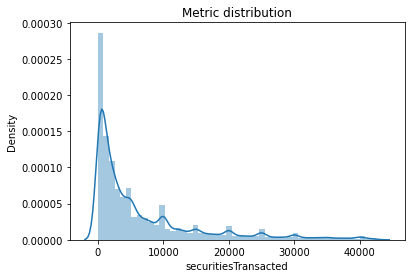

In [231]:
my_basic_research(transactionType2, 'securitiesTransacted')

Text(0.5, 1.0, 'Scatterplot')

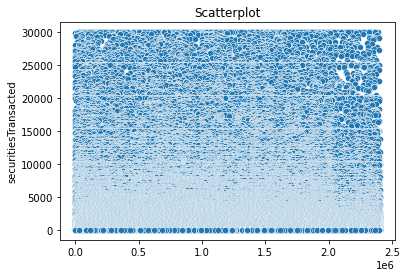

In [240]:
sns.scatterplot( data=transactionType2['securitiesTransacted'])
plt.title("Scatterplot")

In [119]:
mb = pd.read_csv('D:\\Michael\\Data\\Insider trades\\Insider_trades Edit.csv', encoding = 'cp1256')
mb

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Company,Insider Name,Title,BUY/SELL,Shares Bought/Sold,Total Transaction,Shares Held After Transaction,Date,Unnamed: 8
0,LOPE,Brent D Richardson,Chairman,Sell,45000,972450.0,NaN,8/5/2012,202
1,BKCC,Jerrold B Harris,Director,Buy,9976,96866.96,NaN,8/6/2012,22
2,BSX,Ernest Mario,Director,Buy,32000,169280.0,NaN,8/6/2012,22
3,CWT,David B Healey,Insider,Buy,2814,52481.1,NaN,8/6/2012,3
4,CIVB,Allen R Nickles,Director,Buy,1000,5600.0,NaN,8/6/2012,22
...,...,...,...,...,...,...,...,...,...
287523,TTEK,J Kenneth Thompson,Director,Sell,4200,638526.0,NaN,9/3/2021,22
287524,TZOO,Holger Bartel,CEO,Sell,5508,68739.84,NaN,9/3/2021,102
287525,UI,Ronald Sege,Director,Sell,1584,521627.04,NaN,9/3/2021,22
287526,WMT,S Robson Walton,Director,Sell,544383,81134842.32,NaN,9/3/2021,22


In [196]:
mb1 = mb.loc[(mb['BUY/SELL'] == 'Sell')  ,:].sort_values(by = ['Shares Bought/Sold'], ascending = False)
mb1

,Company,Insider Name,Title,BUY/SELL,Shares Bought/Sold,Total Transaction,Shares Held After Transaction,Date,Unnamed: 8
162939,EQH,Axa,Major Shareholder,Sell,157837500,3156750000,NaN,5/14/2018,301
64817,CFG,Bank Of Scotland Group P Royal,Major Shareholder,Sell,155250000,3643717500.0,NaN,3/30/2015,301
219449,EQH,Axa,Major Shareholder,Sell,144000000,3139200000,47162500.0,11/13/2019,301
79108,CFG,Bank Of Scotland Group P Royal,Major Shareholder,Sell,110461782,2582596463,NaN,11/3/2015,301
192459,KOS,Pincus & Co. Warburg,Director,Sell,81504790,530596182.9,NaN,3/1/2019,22
...,...,...,...,...,...,...,...,...,...
269314,ED,Robert Muccilo,Insider,Sell,0,0.0,8009.0,4/8/2021,3
272053,UVSP,K Leon Moyer,Director,Sell,0,0.0,NaN,5/5/2021,22
233463,MS,Ufj Financial Group Mitsubishi,Major Shareholder,Sell,0,0,NaN,4/1/2020,301
261280,INGR,Y Landazuri Pierre Perez,SVP,Sell,0,0,NaN,2/6/2021,42


In [203]:

mb2 = mb1.iloc[20000:,:]
# mb2['Shares Bought/Sold'] = np.log(mb2['Shares Bought/Sold'])

# mb2 = mb2.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
# mb2 = mb2.dropna()
mb2

,Company,Insider Name,Title,BUY/SELL,Shares Bought/Sold,Total Transaction,Shares Held After Transaction,Date,Unnamed: 8
13413,EA,Patrick Soderlund,EVP,Sell,75000,1735500.0,NaN,5/29/2013,51
262923,DCT,Vincent A Chippari,CFO,Sell,75000,4108500.0,675304.0,2/19/2021,32
106103,TSC,James F Getz,Chairman,Sell,75000,1143750,NaN,9/7/2016,202
147705,AMD,James Robert Anderson,SVP,Sell,75000,754500,398773.0,12/7/2017,42
267275,TLYS,Tricia D Smith,CMO,Sell,75000,900000.0,75000.0,3/19/2021,43
...,...,...,...,...,...,...,...,...,...
269314,ED,Robert Muccilo,Insider,Sell,0,0.0,8009.0,4/8/2021,3
272053,UVSP,K Leon Moyer,Director,Sell,0,0.0,NaN,5/5/2021,22
233463,MS,Ufj Financial Group Mitsubishi,Major Shareholder,Sell,0,0,NaN,4/1/2020,301
261280,INGR,Y Landazuri Pierre Perez,SVP,Sell,0,0,NaN,2/6/2021,42


Basic metrics
count    195511.000000
mean      12532.955082
std       14938.970800
min           0.000000
25%        2500.000000
50%        6500.000000
75%       16400.000000
max       75000.000000
Name: Shares Bought/Sold, dtype: float64
------------------------------------
The most popular metric values, top 5
10000    8553
5000     7659
2000     4980
1000     4494
20000    4181
Name: Shares Bought/Sold, dtype: int64
------------------------------------
Kurtosis  3.3753655084145295
Skewness  1.9020033783530903
------------------------------------


C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


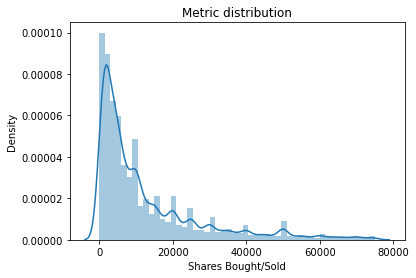

In [204]:
my_basic_research(mb2, 'Shares Bought/Sold')


Text(0.5, 1.0, 'Scatterplot')

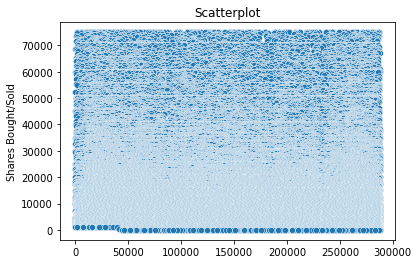

In [205]:
sns.scatterplot( data=mb2['Shares Bought/Sold'])
plt.title("Scatterplot")

In [241]:
typeinsider = pd.read_csv('D:\\Michael\\Data\\Insider trades\\FMP\\typeOfOwner1.csv')
typeinsider

,upper,value
0,OFFICER: (2),NaN
1,OTHER: (2),NaN
2,"10 PERCENT OWNER, OTHER: (1)",NaN
3,OFFICER: VICE PRES. AND TREASURER,VICE PRES. AND TREASURER
4,"OTHER: ""OFFICER"" UNDER SEC 16 RULES","""OFFICER"" UNDER SEC 16 RULES"
...,...,...
27942,"OFFICER: ZONE PRESIDENT, LATIN AMERICA","ZONE PRESIDENT, LATIN AMERICA"
27943,"DIRECTOR, 10 PERCENT OWNER",NaN
27944,DIRECTOR,NaN
27945,"DIRECTOR, .",NaN


In [259]:
typeinsider = typeinsider.dropna()
typeinsider

,upper,value
3,OFFICER: VICE PRES. AND TREASURER,VICE PRES. AND TREASURER
4,"OTHER: ""OFFICER"" UNDER SEC 16 RULES","""OFFICER"" UNDER SEC 16 RULES"
5,"OTHER: ""OFFICER"" UNDER SEC. 16 RULES","""OFFICER"" UNDER SEC. 16 RULES"
6,OTHER: & CEO,& CEO
7,OTHER: & CEO OF APRIA,& CEO OF APRIA
...,...,...
27938,OFFICER: ZONE PRESIDENT US,ZONE PRESIDENT US
27939,"OFFICER: ZONE PRESIDENT, AMEA","ZONE PRESIDENT, AMEA"
27940,"OFFICER: ZONE PRESIDENT, CANADA","ZONE PRESIDENT, CANADA"
27941,"OFFICER: ZONE PRESIDENT, EUROPE","ZONE PRESIDENT, EUROPE"


In [316]:
typeinsider1 = typeinsider.value
typeinsider1

3             VICE PRES. AND TREASURER
4         "OFFICER" UNDER SEC 16 RULES
5        "OFFICER" UNDER SEC. 16 RULES
6                                & CEO
7                       & CEO OF APRIA
                     ...              
27938                ZONE PRESIDENT US
27939             ZONE PRESIDENT, AMEA
27940           ZONE PRESIDENT, CANADA
27941           ZONE PRESIDENT, EUROPE
27942    ZONE PRESIDENT, LATIN AMERICA
Name: value, Length: 27933, dtype: object

In [338]:
toi = pd.DataFrame(columns = ['type'])

typeinsider2 = typeinsider1.str.split(r' AND | & |, |/| / |; |;|,|&', expand = True)

for i in range(typeinsider2.shape[1]):
    a = pd.DataFrame(typeinsider2.iloc[:,i])
#     a.rename(columns={'0': 'type'}, inplace=True)
    a.columns = ['type']
    toi = toi.append(a)
    
toi

,type
3,VICE PRES.
4,"""OFFICER"" UNDER SEC 16 RULES"
5,"""OFFICER"" UNDER SEC. 16 RULES"
6,
7,
...,...
27938,None
27939,None
27940,None
27941,None


In [339]:
toi.drop_duplicates(inplace = True)
toi

,type
3,VICE PRES.
4,"""OFFICER"" UNDER SEC 16 RULES"
5,"""OFFICER"" UNDER SEC. 16 RULES"
6,
12,CHIEF INVESTMENT OFFICER
...,...
12865,THE BOARD OF DIRECTORS OF THE ISSUER APPROVED ...
2338,IN EACH CASE
12865,EQUITY-BASED AWARDS
2338,ARE NOT REGISTERED SECURITIES.


In [138]:
toi = pd.read_csv('D:\\Michael\\Data\\Insider trades\\FMP\\typeOfOwner4.csv')
toi

,OWNER
0,C.A.O.
1,CA0
2,CAO
3,CH ACCT OFFCR
4,CH ACCTG OFFICER
...,...
66,INTERIM CHIEF ACCOUNTING OFF
67,INTERIM CHIEF ACCOUNTING OFFIC
68,INTERIM CHIEF ACCOUNTING OFFICER
69,INTERIM CHIEF ACCT. OFFICER


In [394]:
tt = Result.loc[(Result.transactionType == 'P-Purchase') ,:]
tt.to_csv('D:\\Michael\\Data\\Insider trades\\FMP\\noneed.csv', index = False)
tt

,symbol,filingDate,transactionDate,reportingCik,transactionType,securitiesOwned,companyCik,reportingName,typeOfOwner,acquistionOrDisposition,formType,securitiesTransacted,price,securityName,link
56,GALT,2017-01-09 17:24:27,2016-12-23,1453356,P-Purchase,6.0,1133416,"10X Fund, L.P.",10 PERCENT OWNER,A,4,1.0,NaN,Lock-Up Warrant,https://www.sec.gov/Archives/edgar/data/000113...
57,GALT,2017-01-09 17:24:27,2016-12-23,1453356,P-Purchase,3.0,1133416,"10X Fund, L.P.",10 PERCENT OWNER,A,4,1.0,NaN,Series B-3 Warrant,https://www.sec.gov/Archives/edgar/data/000113...
58,GALT,2017-01-09 17:24:27,2016-12-23,1453356,P-Purchase,2508000.0,1133416,"10X Fund, L.P.",10 PERCENT OWNER,A,4,1008000.0,1.1237,Series B-3 Convertible Preferred Stock,https://www.sec.gov/Archives/edgar/data/000113...
59,GALT,2017-01-09 17:24:27,2016-12-23,1453356,P-Purchase,7.0,1133416,"10X Fund, L.P.",10 PERCENT OWNER,A,4,1.0,NaN,Lock-Up Warrant,https://www.sec.gov/Archives/edgar/data/000113...
69,GALT,2016-10-24 18:47:09,2016-09-29,1453356,P-Purchase,5.0,1133416,"10X Fund, L.P.",10 PERCENT OWNER,A,4,1.0,NaN,Lock-Up Warrant,https://www.sec.gov/Archives/edgar/data/000113...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042596,CBRL,2006-01-10 13:25:24,2006-01-06,1192896,P-Purchase,7099.0,1067294,ZYLSTRA MICHAEL J,OFFICER: VP & GENERAL COUNSEL,A,4,100.0,34.9400,Common Stock,https://www.sec.gov/Archives/edgar/data/000106...
2042629,THRY,2021-09-14 17:48:50,2021-09-13,1824557,P-Purchase,840.0,1556739,Zynczak Heather,DIRECTOR,A,4,840.0,29.5000,Common Shares,https://www.sec.gov/Archives/edgar/data/000155...
2042630,THRYW,2021-09-14 17:48:50,2021-09-13,1824557,P-Purchase,840.0,1556739,Zynczak Heather,DIRECTOR,A,4,840.0,29.5000,Common Shares,https://www.sec.gov/Archives/edgar/data/000155...
2042651,AEYE,2020-07-10 16:33:01,2020-07-08,1679876,P-Purchase,26660.0,1362190,ZYNGIER ALEXANDRE,DIRECTOR,A,4,16260.0,9.2250,Common Stock,https://www.sec.gov/Archives/edgar/data/000136...


In [484]:
# asa = pd.DataFrame(tt.typeOfOwner.str.count(re.escape('VICE PRES.'))).replace(['0', 0], np.nan)
# asa.dropna(inplace = True)
asa = np.count_nonzero(pd.DataFrame(tt.typeOfOwner.str.count(re.escape('VICE PRES.'))) > 0, axis=0)[0]
# asa.to_csv('D:\\Michael\\Data\\Insider trades\\FMP\\noneed.csv', index = False)
asa

142

In [171]:
toi = pd.read_csv('D:\\Michael\\Data\\Insider trades\\FMP\\typeOfOwner4.csv')
toi['count'] = 0
ss = 0
for i in range(toi.shape[0]):
    clear_output(wait = True)
    print('Downloading: ' + str(round(ss*100/(toi.shape[0]-1),2)) + '%')
    n = pd.DataFrame(Result.typeOfOwner.str.count(re.escape(toi.iloc[i,0]))).replace(['0', 0], np.nan).count()
#     n = np.count_nonzero(pd.DataFrame(Result.typeOfOwner.str.count(re.escape(toi.iloc[i,0]))) > 0, axis=0)
    ss +=1
    toi.iloc[i,1] = n
toi.to_csv('D:\\Michael\\Data\\Insider trades\\FMP\\typeOfOwner5.csv', index = False)    
toi

Downloading: 100.0%


,OWNER,count
0,FINANCIAL OFFICER,123092
1,CHIEF FINANCIAL OFFICER,121827


In [170]:
toi.to_csv('D:\\Michael\\Data\\Insider trades\\FMP\\typeOfOwner5.csv', index = False)

In [31]:
Result.reportingName = Result.reportingName.str.lower()
Result

,symbol,filingDate,transactionDate,reportingCik,transactionType,securitiesOwned,companyCik,reportingName,typeOfOwner,acquistionOrDisposition,formType,securitiesTransacted,price,securityName,link
0,GALT,2022-02-04 18:23:24,2022-02-02,1453356,S-Sale,6178940.0,1133416,"10x fund, l.p.",10 PERCENT OWNER,D,4,10000.0,2.10,Common Stock,https://www.sec.gov/Archives/edgar/data/000113...
1,GALT,2022-01-13 15:42:07,2022-01-11,1453356,S-Sale,6188940.0,1133416,"10x fund, l.p.",10 PERCENT OWNER,D,4,10000.0,2.10,Common Stock,https://www.sec.gov/Archives/edgar/data/000113...
2,GALT,2021-12-06 12:42:51,2021-12-02,1453356,S-Sale,6198940.0,1133416,"10x fund, l.p.",10 PERCENT OWNER,D,4,10000.0,2.37,Common Stock,https://www.sec.gov/Archives/edgar/data/000113...
3,GALT,2021-11-04 11:55:59,2021-11-01,1453356,S-Sale,6208940.0,1133416,"10x fund, l.p.",10 PERCENT OWNER,D,4,10000.0,3.19,Common Stock,https://www.sec.gov/Archives/edgar/data/000113...
4,GALT,2021-10-19 15:18:14,2021-10-15,1453356,S-Sale,6218940.0,1133416,"10x fund, l.p.",10 PERCENT OWNER,D,4,10000.0,3.37,Common Stock,https://www.sec.gov/Archives/edgar/data/000113...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4445114,AFFS,2014-03-07 16:12:23,2014-01-09,1380832,G-Gift,129638.0,1365555,zyskind barry d,"DIRECTOR, 10 PERCENT OWNER, OFFICER: CHAIRMAN,...",A,4,19638.0,0.00,Common Stock,https://www.sec.gov/Archives/edgar/data/000136...
4445115,AFFS,2013-02-20 14:24:52,2013-02-15,1380832,F-InKind,6380523.0,1365555,zyskind barry d,"DIRECTOR, 10 PERCENT OWNER, OFFICER: CHAIRMAN,...",D,4,29357.0,33.03,Common Stock,https://www.sec.gov/Archives/edgar/data/000136...
4445116,AFFS,2012-12-21 14:43:00,2012-12-20,1380832,G-Gift,6762125.0,1365555,zyskind barry d,"DIRECTOR, 10 PERCENT OWNER, OFFICER: CHAIRMAN,...",D,4,76575.0,0.00,Common Stock,https://www.sec.gov/Archives/edgar/data/000136...
4445117,AFFS,2012-12-21 14:43:00,2012-12-20,1380832,G-Gift,6409880.0,1365555,zyskind barry d,"DIRECTOR, 10 PERCENT OWNER, OFFICER: CHAIRMAN,...",D,4,352245.0,0.00,Common Stock,https://www.sec.gov/Archives/edgar/data/000136...


In [93]:
request = Result[(Result.typeOfOwner.str.count("ASSISTANT") > 0) & (Result.transactionType == 'S-Sale')].drop_duplicates(subset = 'reportingName')
request.link.head(60).to_csv('D:\\Michael\\Data\\Insider trades\\FMP\\noneed.csv')

In [56]:
request1 = pd.DataFrame(request.reportingName.str.split(expand=True)).iloc[:,0].drop_duplicates()
request1.head(60)

202                    12
1544                  5am
1636                  683
6504             aberdare
8068           abingworth
12430           abu-hadba
16170              acosta
17525               adamo
19703               adams
24648             adelaar
30026            affolter
34494               ahmad
37083                 ain
41622              alario
43905                albi
44358            albiston
45333             arconic
48595           alexander
58042               allen
61074                 all
64857              almond
66330              alpert
67737                alta
75379            ambroseo
76351                  ar
77102              amidon
77478                amir
77523              amitai
79206             amtrust
85733            anderson
94414             andrade
99095           angelakis
103803            anthony
104729          antonelli
108908             apuzzo
110453           arcadian
110616      arcelormittal
110768           archbold
113576      

In [8]:
way = 'D:\\Michael\\Data\\Ratings\\GlobalRank\\GlobalRankGWabs.csv'

In [9]:

pq = pd.read_csv(way)
pq

,Symbol,Date,FinalRank
0,AACG_GRGWabs,2008-01-29,-1.090909
1,AACG_GRGWabs,2008-01-30,-1.090909
2,AACG_GRGWabs,2008-01-31,-1.090909
3,AACG_GRGWabs,2008-02-01,-1.090909
4,AACG_GRGWabs,2008-02-02,-1.090909
...,...,...,...
27379442,ZYXI_GRGWabs,2022-07-17,3.000000
27379443,ZYXI_GRGWabs,2022-07-18,3.000000
27379444,ZYXI_GRGWabs,2022-07-19,3.000000
27379445,ZYXI_GRGWabs,2022-07-20,3.000000


In [10]:
pq.Symbol = pq.Symbol.str.upper()
pq

,Symbol,Date,FinalRank
0,AACG_GRGWABS,2008-01-29,-1.090909
1,AACG_GRGWABS,2008-01-30,-1.090909
2,AACG_GRGWABS,2008-01-31,-1.090909
3,AACG_GRGWABS,2008-02-01,-1.090909
4,AACG_GRGWABS,2008-02-02,-1.090909
...,...,...,...
27379442,ZYXI_GRGWABS,2022-07-17,3.000000
27379443,ZYXI_GRGWABS,2022-07-18,3.000000
27379444,ZYXI_GRGWABS,2022-07-19,3.000000
27379445,ZYXI_GRGWABS,2022-07-20,3.000000


In [11]:
pq.to_csv(way,  index = False)